In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential
import random

In [15]:
absolute_path = os.path.dirname(os.path.dirname(os.getcwd()))
path = absolute_path + "/raw_data/64x64/"
path

'/home/christophelanson/code/christophelanson/icangetyoursmile/raw_data/64x64/'

In [16]:
number = 10
str(number).zfill(4)

'0010'

In [113]:
# create x and y train
data_size = 100
X_train = []
y_train = []
for number in range(data_size):
    no_mask_path = f'{path}No_mask/seed{str(number).zfill(4)}.png'
    no_mask_im = np.asarray(Image.open(no_mask_path)).tolist()
    mask_path = f'{path}Mask/with-mask-default-mask-seed{str(number).zfill(4)}.png'
    mask_im = np.asarray(Image.open(mask_path)).tolist()
    X_train.append(mask_im)
    y_train.append(no_mask_im)

In [135]:
len(mask_im)

64

In [140]:
X_test = Image.open(f'{path}Mask/with-mask-default-mask-seed{1234}.png')
X_test = np.asarray(X_test).tolist()
X_test

[[[83, 80, 70],
  [85, 80, 70],
  [84, 80, 69],
  [87, 83, 74],
  [79, 75, 65],
  [78, 76, 68],
  [88, 87, 79],
  [96, 96, 87],
  [94, 95, 89],
  [88, 89, 81],
  [91, 91, 85],
  [86, 85, 79],
  [84, 81, 75],
  [84, 81, 74],
  [70, 68, 60],
  [69, 66, 58],
  [74, 70, 61],
  [76, 73, 62],
  [80, 79, 74],
  [74, 72, 64],
  [86, 82, 72],
  [76, 74, 64],
  [45, 43, 36],
  [45, 42, 36],
  [73, 75, 64],
  [97, 101, 92],
  [96, 100, 92],
  [95, 103, 93],
  [102, 110, 99],
  [89, 97, 88],
  [77, 79, 68],
  [68, 67, 58],
  [74, 72, 65],
  [79, 78, 68],
  [83, 80, 69],
  [76, 73, 64],
  [83, 82, 75],
  [85, 84, 78],
  [84, 82, 77],
  [94, 93, 84],
  [86, 87, 78],
  [79, 78, 70],
  [85, 83, 74],
  [87, 84, 76],
  [80, 76, 68],
  [84, 80, 68],
  [94, 94, 81],
  [91, 91, 78],
  [85, 86, 78],
  [90, 91, 86],
  [95, 93, 84],
  [89, 87, 78],
  [79, 80, 74],
  [74, 74, 68],
  [75, 73, 66],
  [82, 80, 73],
  [84, 83, 77],
  [85, 83, 78],
  [87, 81, 73],
  [79, 76, 69],
  [78, 77, 71],
  [72, 70, 64],
  [

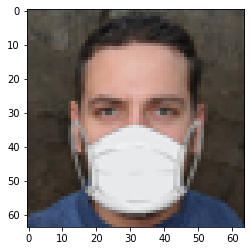

In [132]:
plt.imshow(X_test)

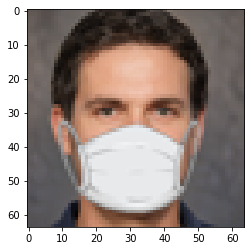

In [138]:
plt.imshow(X_train[20])

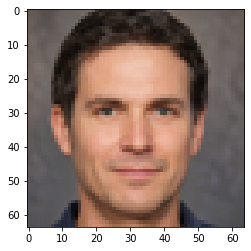

In [139]:
plt.imshow(y_train[20])

In [161]:
from icangetyoursmile.models import unet

In [169]:
model = unet()

In [170]:
#model.summary()

In [178]:
model.fit(X_train, y_train, batch_size=8, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 53ms/step - loss: 3679.9429
Epoch 2/200
13/13 [==============================] - 1s 52ms/step - loss: 3266.1438
Epoch 3/200
13/13 [==============================] - 1s 55ms/step - loss: 2939.4644
Epoch 4/200
13/13 [==============================] - 1s 55ms/step - loss: 2673.4729
Epoch 5/200
13/13 [==============================] - 1s 53ms/step - loss: 2443.8799
Epoch 6/200
13/13 [==============================] - 1s 54ms/step - loss: 2251.3667
Epoch 7/200
13/13 [==============================] - 1s 54ms/step - loss: 2093.2534
Epoch 8/200
13/13 [==============================] - 1s 53ms/step - loss: 1966.1598
Epoch 9/200
13/13 [==============================] - 1s 53ms/step - loss: 1868.7267
Epoch 10/200
13/13 [==============================] - 1s 52ms/step - loss: 1770.9398
Epoch 11/200
13/13 [==============================] - 1s 52ms/step - loss: 1699.6809
Epoch 12/200
13/13 [==============================] - 1s 52ms/step - loss:

13/13 [==============================] - 1s 56ms/step - loss: 459.9967
Epoch 99/200
13/13 [==============================] - 1s 56ms/step - loss: 456.0685
Epoch 100/200
13/13 [==============================] - 1s 53ms/step - loss: 452.2584
Epoch 101/200
13/13 [==============================] - 1s 52ms/step - loss: 450.0898
Epoch 102/200
13/13 [==============================] - 1s 54ms/step - loss: 448.8448
Epoch 103/200
13/13 [==============================] - 1s 53ms/step - loss: 443.9083
Epoch 104/200
13/13 [==============================] - 1s 52ms/step - loss: 446.4149
Epoch 105/200
13/13 [==============================] - 1s 53ms/step - loss: 441.2455
Epoch 106/200
13/13 [==============================] - 1s 52ms/step - loss: 440.6944
Epoch 107/200
13/13 [==============================] - 1s 52ms/step - loss: 435.2159
Epoch 108/200
13/13 [==============================] - 1s 55ms/step - loss: 431.1400
Epoch 109/200
13/13 [==============================] - 1s 57ms/step - loss: 426.

13/13 [==============================] - 1s 56ms/step - loss: 283.3105
Epoch 195/200
13/13 [==============================] - 1s 54ms/step - loss: 282.7004
Epoch 196/200
13/13 [==============================] - 1s 53ms/step - loss: 281.4729
Epoch 197/200
13/13 [==============================] - 1s 54ms/step - loss: 280.7993
Epoch 198/200
13/13 [==============================] - 1s 55ms/step - loss: 278.2599
Epoch 199/200
13/13 [==============================] - 1s 54ms/step - loss: 276.8275
Epoch 200/200
13/13 [==============================] - 1s 55ms/step - loss: 276.6107


In [179]:
#model.evaluate(X_train,y_train)

In [180]:
np.asarray(X_test).shape

(64, 64, 3)

In [181]:
np.expand_dims(X_test,0).shape

(1, 64, 64, 3)

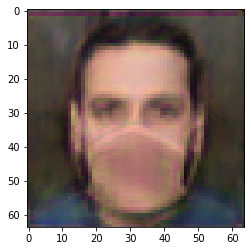

In [182]:
plt.imshow(np.squeeze(model.predict(np.expand_dims(X_test,0))).astype(np.uint8))